In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print('class labels:',np.unique(y))

class labels: [0 1 2]


In [3]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=1,stratify=y)

In [4]:
sc=StandardScaler()
sc.fit(X_train) #q
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',random_state=1)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [6]:
from matplotlib.colors import ListedColormap
cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'])
x_min,x_max=X_train[:,0].min()-1,X_train[:,0].max()+1
y_min,y_max=X_train[:,1].min()-1,X_train[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                 np.arange(y_min,y_max,.02))
z=tree.predict(np.c_[xx.ravel(),yy.ravel()])



(-0.9, 3.4800000000000044)

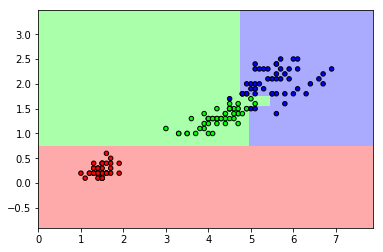

In [16]:
Z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor='k',s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

In [17]:
import graphviz
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [18]:
dot_data=export_graphviz(tree,filled=True,
                        rounded=True,
                        class_names=['Setosa',
                                    'Versicolor',
                                    'Virginica'],
                        feature_names=['petal length',
                                      'petal width'],
                        out_file=None)

graph=graph_from_dot_data(dot_data)
graph.write_png('tree_entropy.png')

True